<a href="https://colab.research.google.com/github/URAM-KOR/vgames2/blob/main/AI_05_%EA%B9%80%EC%9A%B0%EB%9E%8C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

                     Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                               
Action        1999.366132  0.258142  0.155809  0.047340     0.056009
Adventure     2001.908661  0.081953  0.049891  0.040523     0.012914
Fighting      1990.491018  0.261913  0.117828  0.101535     0.042668
Misc          1995.529032  0.232843  0.120842  0.060467     0.042434
Platform      1985.735698  0.499118  0.219446  0.146900     0.057704
Puzzle        1977.024691  0.212664  0.087059  0.098391     0.021574
Racing        1988.617213  0.277747  0.189107  0.045149     0.061689
Role-Playing  1996.148022  0.214390  0.122704  0.224659     0.037316
Shooter       1987.249219  0.435344  0.234572  0.029220     0.077913
Simulation    1994.783274  0.207769  0.129757  0.072162     0.036312
Sports        1996.832971  0.285523  0.159180  0.057206     0.057010
Strategy      1990.970149  0.099485  0.066471  0.071206     0.016250


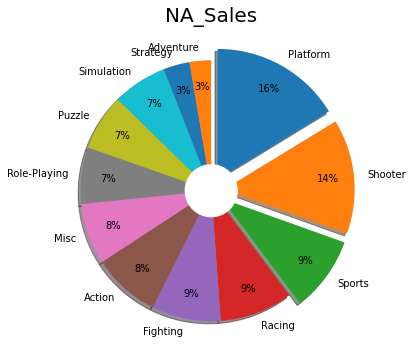

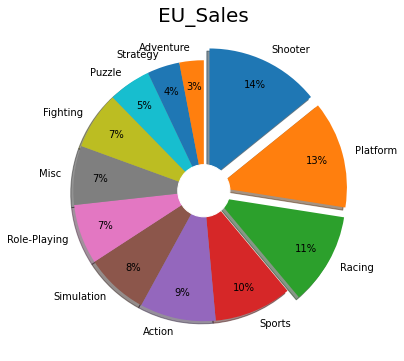

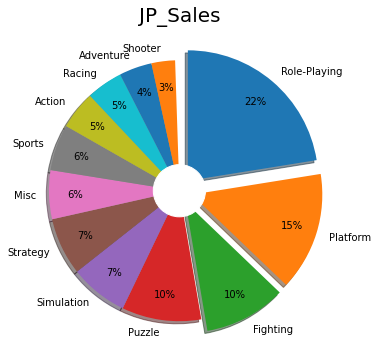

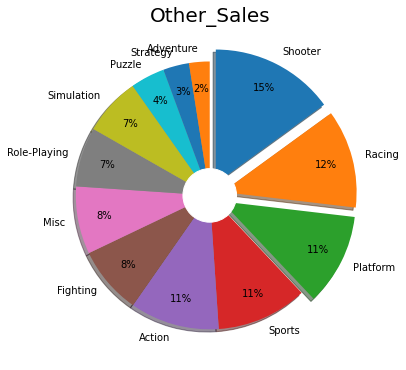

Genre
Shooter         0.077913
Racing          0.061689
Platform        0.057704
Sports          0.057010
Action          0.056009
Fighting        0.042668
Misc            0.042434
Role-Playing    0.037316
Simulation      0.036312
Puzzle          0.021574
Strategy        0.016250
Adventure       0.012914
Name: Other_Sales, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')    
df.iloc[:,6:10] = df.iloc[:,6:10].apply(pd.to_numeric, errors='coerce')      #데이터 numeric
df.iloc[:,6:10] = df.iloc[:,6:10].fillna(0)      #결측값 0
df = df.drop('Unnamed: 0',axis=1)    # 1열 삭제
# print(df.isna().sum())  #결측치 확인
df_nara = df.groupby('Genre').mean()  # Genre 별 합 
print(df_nara)
df_nara['Genre'] = df_nara.index
df_na = df_nara.sort_values(by = ['NA_Sales'], ascending = False)  # 나라별 내림차순
df_eu = df_nara.sort_values(by = ['EU_Sales'], ascending = False)
df_jp = df_nara.sort_values(by = ['JP_Sales'], ascending = False)
df_other = df_nara.sort_values(by = ['Other_Sales'], ascending = False)


# 원형그래프
# NA_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,6))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_na['NA_Sales'],
        labels=df_na['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8 , 
        counterclock= 0)
plt.title('NA_Sales', fontsize=20)
plt.show()

# EU_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,6))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_eu['EU_Sales'],
        labels=df_eu['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8 , 
        counterclock= 0)
plt.title('EU_Sales', fontsize=20)
plt.show()

# JP_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,6))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_jp['JP_Sales'],
        labels=df_jp['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8 , 
        counterclock= 0)
plt.title('JP_Sales', fontsize=20)
plt.show()

# Other_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,7))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_other['Other_Sales']*100,
        labels=df_other['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8,
        counterclock= 0)
plt.title('Other_Sales', fontsize=20)
plt.show()
print(df_other['Other_Sales'])

연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

a <= Year <= b
a 입력하세요
2000
b 입력하세요
2016
      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales     Total
0   2000.0  0.270957  0.147855  0.109420     0.033159  0.561391
1   2001.0  0.351695  0.188368  0.080795     0.046548  0.667406
2   2002.0  0.259563  0.131701  0.050437     0.033013  0.474714
3   2003.0  0.243012  0.131173  0.043259     0.033246  0.450691
4   2004.0  0.288212  0.139430  0.050927     0.061735  0.540305
5   2005.0  0.257390  0.129850  0.057433     0.043251  0.487925
6   2006.0  0.256864  0.127715  0.071002     0.051944  0.507525
7   2007.0  0.255524  0.133479  0.050444     0.064845  0.504292
8   2008.0  0.244176  0.128195  0.042385     0.056532  0.471288
9   2009.0  0.237221  0.132193  0.043124     0.052137  0.464676
10  2010.0  0.229936  0.134712  0.039167     0.045833  0.449647
11  2011.0  0.205107  0.142877  0.046687     0.046892  0.441563
12  2012.0  0.232147  0.176120  0.078113     0.057377  0.543758
13  2013.0  0.249669  0.216446  0.078600     0.069853  0.614567

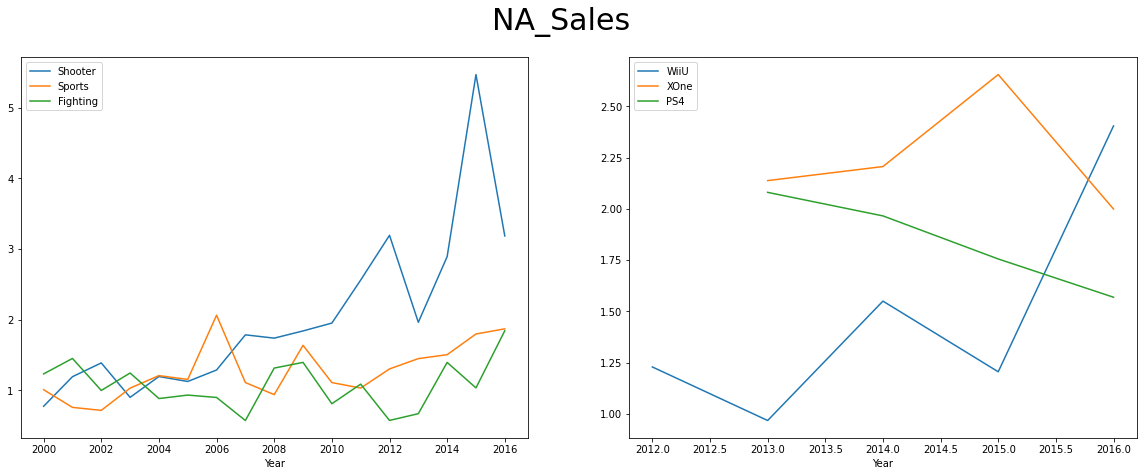

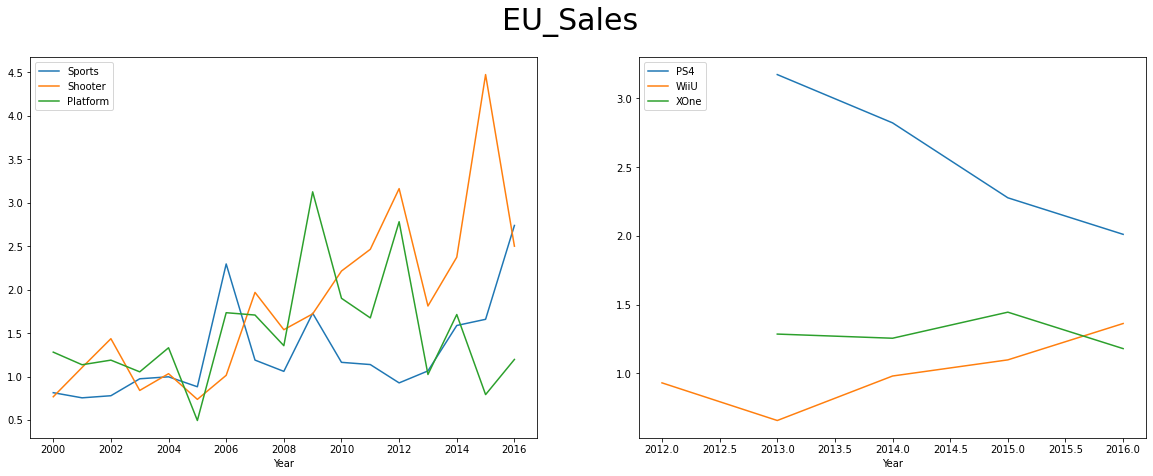

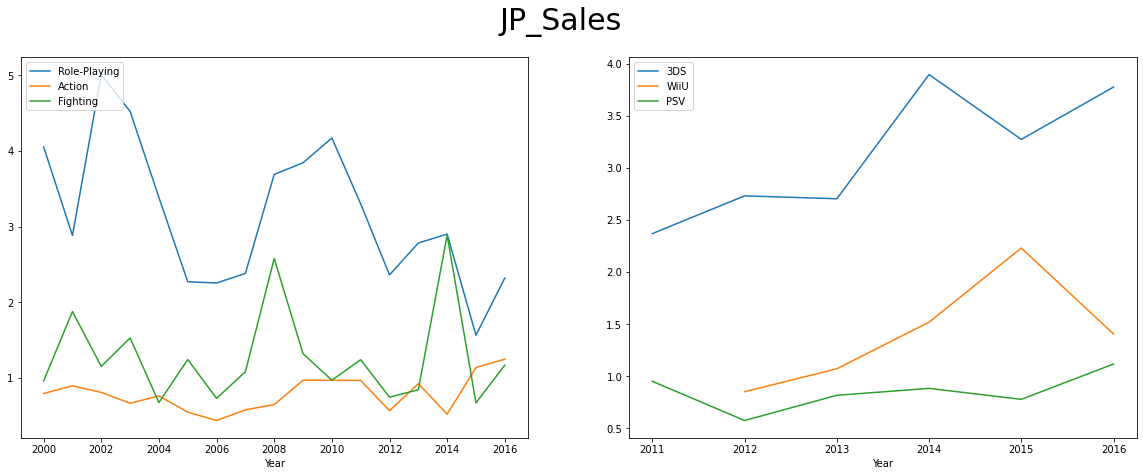

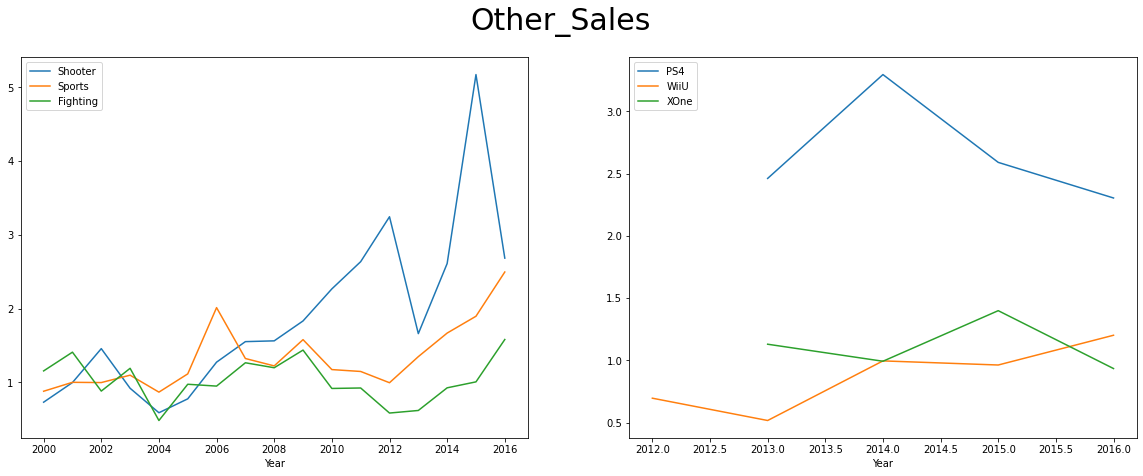

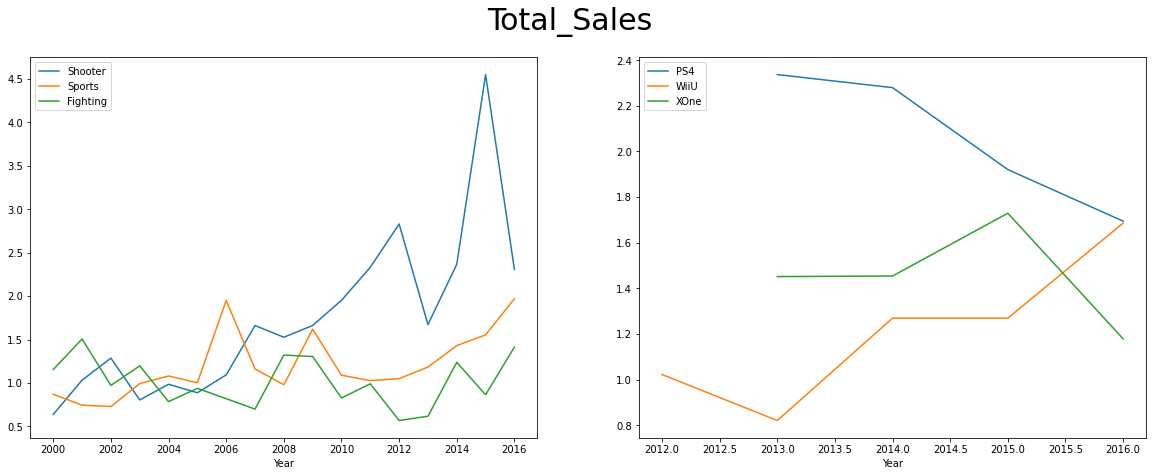

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')    
df.iloc[:,6:10] = df.iloc[:,6:10].apply(pd.to_numeric, errors='coerce')      #데이터 numeric
df.iloc[:,6:10] = df.iloc[:,6:10].fillna(0)      #결측값 0
df = df.drop('Unnamed: 0',axis=1)    # 1열 삭제
# print(df.isna().sum())  #결측치 확인
print('a <= Year <= b')
print('a 입력하세요')
a = int(input())
print('b 입력하세요')
b = int(input())
df[(df['Year'] < a )] = np.nan    # Year < 1000  =>  nan
df[(df['Year'] > b )] = np.nan    # Year > 1000  =>  nan
df = df.dropna(subset = ['Year'])  # Year 열 결측치 삭제
df = df.dropna(subset = ['Genre'])  # Genre 열 결측치 삭제
df = df.sort_values(by = ['Year'], ascending = True) # 연도별 오름차순
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df = df.drop(['Name','Publisher'],axis=1)
# df['Year'] = pd.to_datetime(df['Year'], format = '%Y')  # Year 을 datetime64 형식으로 변환
df_G = df.groupby(['Year','Genre']).mean().reset_index()  # Year, Genre 별 평균
df_Y = df.groupby(['Year']).mean().reset_index()  # Year 별 평균 
df_P = df.groupby(['Year','Platform']).mean().reset_index()  # Year, Genre 별 평균
df_G = pd.merge(df_G,df_Y,how='left',on='Year')   
df_P = pd.merge(df_P,df_Y,how='left',on='Year')
print(df_Y)

#top3 함수정의
def top(df,col2,col1):   #df 에서 'col2' 별 'col1' 값의 top3 'series'반환
    A = (df[(df['Year'] == b)].sort_values(col1,ascending = False)[col2].head(3))
    C=[]
    for i in A:
        B = pd.DataFrame(df[df[col2]==i])
        C.append(B)
    return pd.concat(C)

    
df_G_N = top(df_G,'Genre','NA_Sales_x')
df_P_N = top(df_P,'Platform','NA_Sales_x')
df_G_E = top(df_G,'Genre','EU_Sales_x')
df_P_E = top(df_P,'Platform','EU_Sales_x')
df_G_J = top(df_G,'Genre','JP_Sales_x')
df_P_J = top(df_P,'Platform','JP_Sales_x')
df_G_O = top(df_G,'Genre','Other_Sales_x')
df_P_O = top(df_P,'Platform','Other_Sales_x')
df_G_T = top(df_G,'Genre','Total_x')
df_P_T = top(df_P,'Platform','Total_x')


#NA_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('NA_Sales', size = 30)

sns.lineplot(x=df_G_N['Year'], y=df_G_N['NA_Sales_x']/df_G_N['NA_Sales_y'], data=df_G_N['NA_Sales_x']/df_G_N['NA_Sales_y'],
             hue=df_G_N['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_N['Year'], y=df_P_N['NA_Sales_x']/df_P_N['NA_Sales_y'], data=df_P_N['NA_Sales_x']/df_P_N['NA_Sales_y'],
             hue=df_P_N['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#EU_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('EU_Sales', size = 30)

sns.lineplot(x=df_G_E['Year'], y=df_G_E['EU_Sales_x']/df_G_E['EU_Sales_y'], data=df_G_E['EU_Sales_x']/df_G_E['EU_Sales_y'],
             hue=df_G_E['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_E['Year'], y=df_P_E['EU_Sales_x']/df_P_E['EU_Sales_y'], data=df_P_E['EU_Sales_x']/df_P_E['EU_Sales_y'],
             hue=df_P_E['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#JP_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('JP_Sales', size = 30)

sns.lineplot(x=df_G_J['Year'], y=df_G_J['JP_Sales_x']/df_G_J['JP_Sales_y'], data=df_G_J['JP_Sales_x']/df_G_J['JP_Sales_y'],
             hue=df_G_J['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_J['Year'], y=df_P_J['JP_Sales_x']/df_P_J['JP_Sales_y'], data=df_P_J['JP_Sales_x']/df_P_J['JP_Sales_y'],
             hue=df_P_J['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#Other_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Other_Sales', size = 30)


sns.lineplot(x=df_G_O['Year'], y=df_G_O['Other_Sales_x']/df_G_O['Other_Sales_y'], data=df_G_O['Other_Sales_x']/df_G_O['Other_Sales_y'],
             hue=df_G_O['Genre'],
             ax=axes[0],
             legend = 'auto')
sns.lineplot(x=df_P_O['Year'], y=df_P_O['Other_Sales_x']/df_P_O['Other_Sales_y'], data=df_P_O['Other_Sales_x']/df_P_O['Other_Sales_y'],
             hue=df_P_O['Platform'],
             ax=axes[1],
             legend = 'auto',
             sizes=(.25, 2.5))
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')

#Total_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Total_Sales', size = 30)

sns.lineplot(x=df_G_T['Year'], y=df_G_T['Total_x']/df_G_T['Total_y'], data=df_G_T['Total_x']/df_G_T['Total_y'],
             hue=df_G_T['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_T['Year'], y=df_P_T['Total_x']/df_P_T['Total_y'], data=df_P_T['Total_x']/df_P_T['Total_y'],
             hue=df_P_T['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.